# Identifying Testability Patterns in the OWASP Benchmark

The aim of this notebook is to extract code patterns which make it hard for testing tools to correctly identify security vulnerabilities.

## Datasets

Datasets are loaded from two places - the scorecard from OWASP benchmark and a list of vectors, one for each test case in the benchmark.

### Vectors

The following is a list of vectors created from the *infercode* tool, running against the benchmark test cases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

df1 = pd.read_csv("benchmark_vectors.csv", header=None, index_col=0)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest01193,0.239783,0.029274,0.985156,0.182951,0.164773,-1.273723,-0.607593,-0.648238,-0.778670,-0.156378,...,-0.138181,0.168693,-0.827260,0.548926,1.554109,-0.732515,0.591260,0.635817,0.050060,-1.192211
BenchmarkTest01304,0.081603,0.082010,0.718629,0.092195,0.373565,-1.288810,-0.598067,-0.673580,-0.794393,-0.154669,...,-0.062706,0.126828,-0.914847,0.442194,1.755898,-0.745973,0.674832,0.445062,-0.037662,-1.201660
BenchmarkTest00711,0.040579,0.018071,0.917949,0.163137,0.223456,-1.266168,-0.571813,-0.582055,-0.753160,-0.224280,...,-0.068698,0.154564,-0.801013,0.375190,1.555841,-0.752634,0.525393,0.496490,-0.042977,-1.157247
BenchmarkTest01515,0.091307,0.030493,0.882424,0.234340,0.427465,-1.182274,-0.387387,-0.616184,-0.743611,-0.181785,...,-0.012761,0.134582,-0.829598,0.313342,1.789121,-0.720814,0.615563,0.534791,-0.033441,-1.189481
BenchmarkTest01417,0.184775,0.097138,0.994879,0.252617,0.124158,-1.355794,-0.574915,-0.676444,-0.742966,-0.199506,...,-0.116791,0.164814,-0.913316,0.469839,1.593683,-0.749556,0.474318,0.571205,-0.048450,-1.203661


### Benchmark results

The scorecard csv from OWAPS benchmark (in this case from ZAP).

In [2]:
df2 = pd.read_csv("scorecard.csv", index_col=0)
df2.head()

,category,CWE,vulnerability,identified,pass/fail
name,,,,,
BenchmarkTest00001,pathtraver,22,true,true,pass
BenchmarkTest00002,pathtraver,22,true,false,fail
BenchmarkTest00003,hash,328,true,false,fail
BenchmarkTest00004,trustbound,501,true,false,fail
BenchmarkTest00005,crypto,327,true,false,fail


In [3]:
df = df2.join(df1)
df

,category,CWE,vulnerability,identified,pass/fail,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
name,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest00001,pathtraver,22,true,true,pass,0.235433,-0.120124,0.898373,0.020175,0.446673,...,-0.089074,0.098290,-0.913902,0.562754,1.747717,-0.720410,0.750564,0.516127,-0.051278,-1.247689
BenchmarkTest00002,pathtraver,22,true,false,fail,0.164164,-0.114276,0.894222,0.070442,0.451752,...,-0.071319,0.042619,-0.962704,0.511350,1.797116,-0.733447,0.804262,0.506926,-0.095240,-1.247762
BenchmarkTest00003,hash,328,true,false,fail,0.096460,-0.162292,0.909454,0.090513,0.467231,...,-0.047350,0.054321,-0.890697,0.385340,1.698658,-0.717848,0.607125,0.466926,-0.082279,-1.217961
BenchmarkTest00004,trustbound,501,true,false,fail,0.203723,-0.069779,0.709390,-0.004596,0.495191,...,-0.027049,0.120374,-0.857488,0.459802,1.633006,-0.707152,0.584042,0.542830,-0.008886,-1.172063
BenchmarkTest00005,crypto,327,true,false,fail,0.054447,-0.171124,0.974497,0.150103,0.494581,...,-0.037726,0.071648,-0.902559,0.371475,1.826984,-0.725862,0.602056,0.424407,-0.109398,-1.235247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BenchmarkTest02736,sqli,89,false,false,pass,0.121606,-0.055012,0.648322,0.066867,0.563047,...,-0.017088,0.074018,-0.974342,0.384322,1.885023,-0.733861,0.806974,0.512355,-0.110761,-1.223881
BenchmarkTest02737,sqli,89,false,false,pass,0.198192,-0.105740,0.629518,0.023393,0.460613,...,-0.047439,0.072303,-0.900748,0.508050,1.743816,-0.726782,0.744142,0.481969,-0.047578,-1.194170
BenchmarkTest02738,sqli,89,false,false,pass,0.049198,-0.031077,0.793183,0.134001,0.407365,...,-0.015074,0.081631,-0.928862,0.383931,1.761332,-0.753227,0.665158,0.431552,-0.079667,-1.202036


## Preliminary Exploration


### Vulnerabilty Types

Try plotting the first two elements of the vector, for all vulnerability types, grouped by true vulnerabilties and *false positives*.

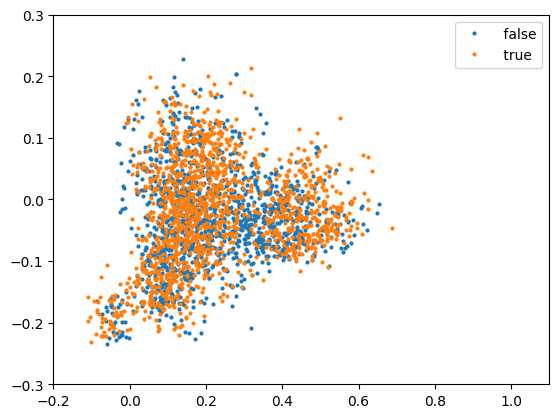

In [4]:
groups = df.groupby('vulnerability')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=2, label=name)
plt.ylim(-0.3, 0.3)
plt.xlim(-0.2, 1.1)
plt.legend()

Seems that the true and false positives are spread over wide range of code, ie the FPs look similar to the true vulnerabilties. Can we predict whether a test case is vulnerable?

In [10]:
X = df[list(range(1,101))]
y = df["vulnerability"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_encoded = le.transform(y)

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)


In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(
    SVC(gamma=2, C=1)
)

fit = clf.fit(X_train, y_train)

In [13]:
score = clf.score(X_test, y_test)
print("  --> result: " + str(score))

  --> result: 0.708029197080292


## Vulnerabilty Types

The same exercise, but grouped by type.

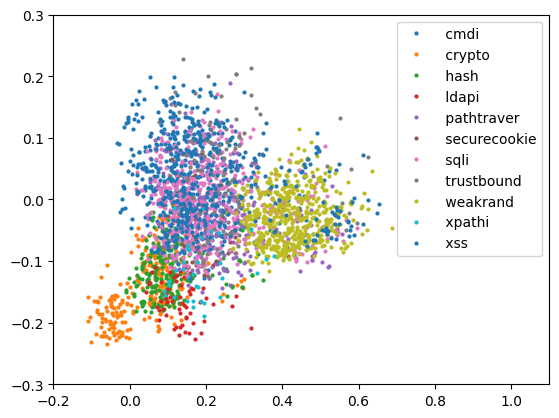

In [5]:
groups = df.groupby('category')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=2, label=name)
plt.ylim(-0.3, 0.3)
plt.xlim(-0.2, 1.1)
plt.legend()

Visually, the different vulnerabilty types occupy different areas of the plot - some features already distinguishable.

In [6]:
X = df[list(range(1,101))]
y = df["category"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_encoded = le.transform(y)

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)


In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(
    SVC(gamma=2, C=1)
)

#clf = KNeighborsClassifier(3)

fit = clf.fit(X_train, y_train)

In [9]:
score = clf.score(X_test, y_test)
print("  --> result: " + str(score))

  --> result: 0.9771897810218978


## Testability Patterns

Now focus on the vulnerable cases in the types we tested for.

In [14]:
rslt_df = df[(df['vulnerability'].str.contains('true')) & (df['category'].str.contains('xss|cmdi|sqli'))] 
rslt_df

,category,CWE,vulnerability,identified,pass/fail,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
name,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest00006,cmdi,78,true,false,fail,0.074070,0.044827,0.721235,0.064175,0.325875,...,-0.006484,0.074133,-0.945382,0.367724,1.632818,-0.742437,0.729657,0.464787,-0.086217,-1.215485
BenchmarkTest00007,cmdi,78,true,false,fail,0.229014,0.020085,0.700129,0.039175,0.405371,...,-0.077258,0.197383,-0.930174,0.371990,1.665202,-0.732908,0.718298,0.713867,-0.131036,-1.210922
BenchmarkTest00008,sqli,89,true,false,fail,0.194282,-0.017194,0.644747,0.017695,0.436753,...,-0.065817,0.088301,-0.988902,0.460748,1.744989,-0.733224,0.699666,0.531183,-0.082190,-1.215932
BenchmarkTest00013,xss,79,true,true,pass,0.149709,0.079701,0.695878,0.084146,0.291568,...,-0.056935,0.142898,-0.891568,0.506658,1.492280,-0.741334,0.553234,0.557344,0.025082,-1.172740
BenchmarkTest00014,xss,79,true,true,pass,0.140207,0.075988,0.727770,0.109069,0.258530,...,-0.047598,0.131803,-0.896160,0.495664,1.469303,-0.745429,0.544183,0.538796,0.018449,-1.173941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BenchmarkTest02651,sqli,89,true,true,pass,0.327784,-0.040636,0.738198,0.057436,0.218104,...,-0.074448,0.086128,-0.875315,0.683709,1.437206,-0.731580,0.571541,0.498701,0.094192,-1.160968
BenchmarkTest02653,sqli,89,true,true,pass,0.464370,-0.000439,0.645641,0.039162,0.175451,...,-0.120251,0.110056,-0.844551,0.729486,1.429995,-0.726427,0.509879,0.558937,0.099538,-1.143774
BenchmarkTest02654,sqli,89,true,true,pass,0.407619,-0.002925,0.699776,0.092414,0.232309,...,-0.071141,0.089652,-0.880733,0.608574,1.464020,-0.722482,0.583016,0.556289,0.026831,-1.159441


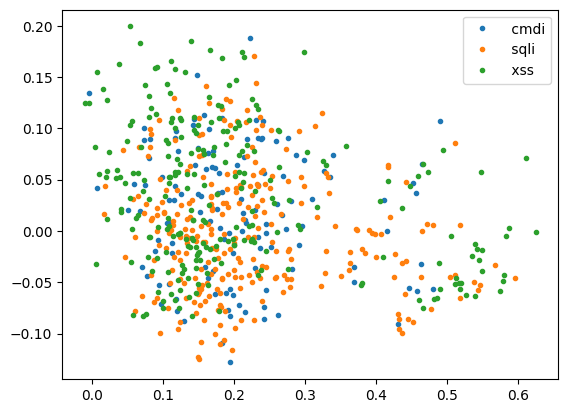

In [15]:
groups = rslt_df.groupby('category')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

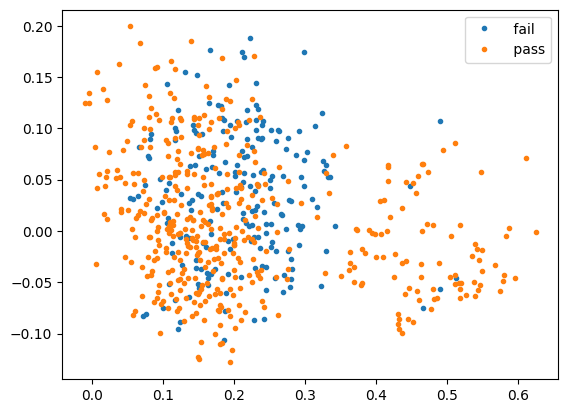

In [16]:
groups = rslt_df.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

### K-Means Clustering

Try to cluster the results, and look for correlations between true positives and false negatives.

In [17]:
X = rslt_df[list(range(1,101))]
y = rslt_df["pass/fail"]

k_means = cluster.KMeans(n_clusters=7)
k_means.fit(X)

print(k_means.labels_[::10])

/home/tbarber/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 5 0 3 2 0 3 3 3 4 0 3 4 3 2 5 4 5 2 1 6 0 0 3 6 5 0 5 4 6 3 2 2 2 5 0
 4 2 1 1 6 5 1 3 0 3 3 1 0 4 2 2 4 4 2 5 5 4 5 0 1 1 6 6]


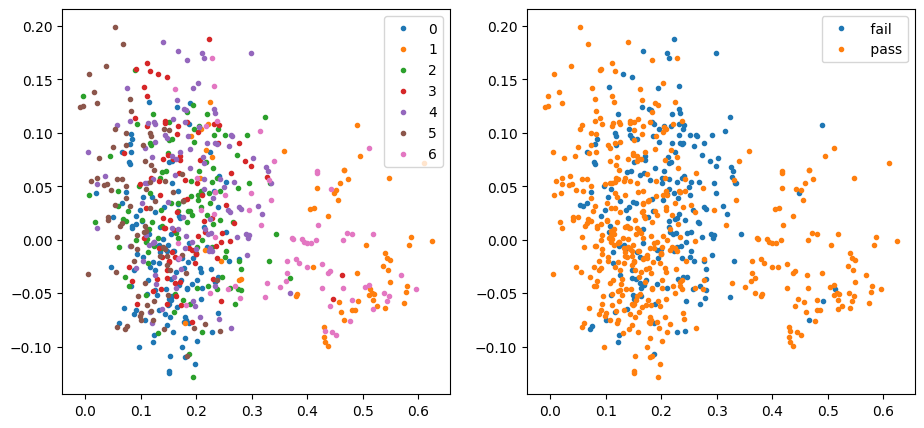

In [18]:
rslt_df_kmeans = rslt_df.copy()

rslt_df_kmeans["kmean"] = k_means.labels_
rslt_df_kmeans["pass/fail"] = y

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = rslt_df_kmeans.groupby('kmean')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = rslt_df_kmeans.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

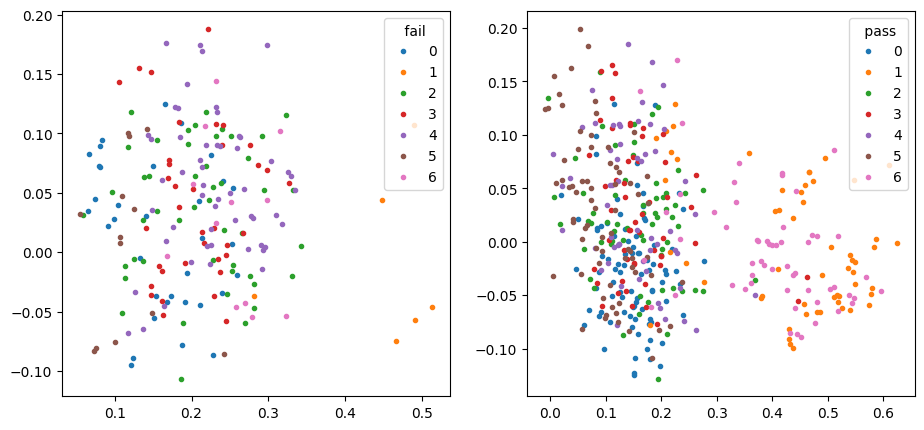

In [19]:
# Same data as plot above but slightly different
fig = plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)

i = 1
groups_pass = rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    groups = group_pass.groupby('kmean')
    plt.subplot(1, 2, i)
    for name, group in groups:
        plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
    plt.legend(title=passed)
    i = i + 1

# Supervised Learning

Can we infer whether the test case will be a false negative or not, just using the vectors?

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_encoded = le.transform(y)

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42
)


In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(
    SVC(gamma=2, C=1)
)

#clf = KNeighborsClassifier(3)

fit = clf.fit(X_train, y_train)

In [22]:
score = clf.score(X_test, y_test)
print("  --> result: " + str(score))

  --> result: 0.8604651162790697


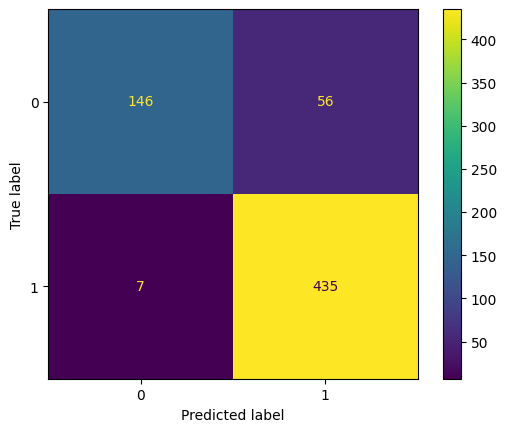

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X)
cm = confusion_matrix(y_encoded, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

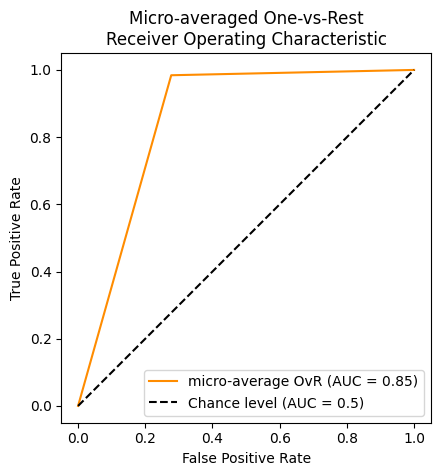

In [24]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_encoded.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

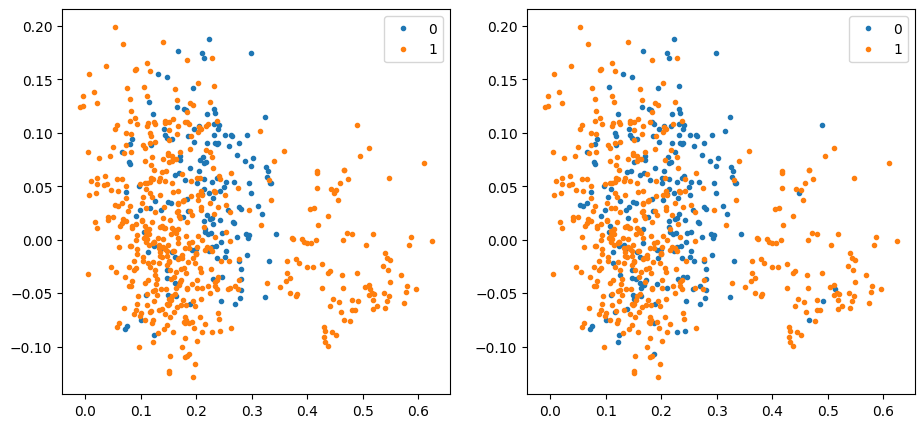

In [25]:
rslt_df_clf = rslt_df.copy()

rslt_df_clf["clf"] = y_pred
rslt_df_clf["pass/fail"] = y_encoded

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = rslt_df_clf.groupby('clf')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = rslt_df_clf.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

Check if we can group the ones which weren't tested correctly

In [59]:
df_cat_fn = df[(df['pass/fail'].str.contains('fail')) & (df['vulnerability'].str.contains('true')) & (df['category'].str.contains('sqli'))] 
df_cat_fn

,category,CWE,vulnerability,identified,pass/fail,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
name,,,,,,,,,,,,,,,,,,,,,
BenchmarkTest00008,sqli,89,true,false,fail,0.194282,-0.017194,0.644747,0.017695,0.436753,...,-0.065817,0.088301,-0.988902,0.460748,1.744989,-0.733224,0.699666,0.531183,-0.082190,-1.215932
BenchmarkTest00018,sqli,89,true,false,fail,0.241177,0.059805,0.620806,0.052128,0.399305,...,-0.074609,0.098020,-1.000544,0.423053,1.739869,-0.734091,0.715191,0.543420,-0.125745,-1.206180
BenchmarkTest00037,sqli,89,true,false,fail,0.242786,0.018349,0.761285,0.038681,0.327231,...,-0.142459,0.151716,-0.962502,0.509927,1.746242,-0.736613,0.632655,0.586918,-0.095201,-1.196500
BenchmarkTest00038,sqli,89,true,false,fail,0.184220,0.027227,0.720179,0.088912,0.357121,...,-0.116265,0.052245,-1.037102,0.448749,1.901903,-0.737826,0.848004,0.471448,-0.153704,-1.229117
BenchmarkTest00039,sqli,89,true,false,fail,0.227489,0.054496,0.729593,0.063806,0.351456,...,-0.113654,0.105371,-1.004132,0.440025,1.798506,-0.730232,0.775043,0.558658,-0.158092,-1.217866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BenchmarkTest02359,sqli,89,true,false,fail,0.294937,0.052720,0.762889,0.091507,0.189156,...,-0.142728,0.122224,-0.922333,0.559122,1.656219,-0.737664,0.618963,0.538609,-0.070842,-1.191349
BenchmarkTest02360,sqli,89,true,false,fail,0.280989,-0.027228,0.816689,0.128515,0.212833,...,-0.106523,0.072154,-0.966773,0.537333,1.533890,-0.735478,0.605094,0.580191,-0.054706,-1.165987
BenchmarkTest02362,sqli,89,true,false,fail,0.280823,-0.046980,0.750555,0.072863,0.283226,...,-0.112289,0.103681,-0.925021,0.538161,1.668499,-0.730182,0.667773,0.538670,-0.048141,-1.190161


In [63]:
X = df_cat_fn[list(range(1,101))]

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

print(k_means.labels_[::10])

[1 1 2 1 1 2 0 1 2]


/home/tbarber/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


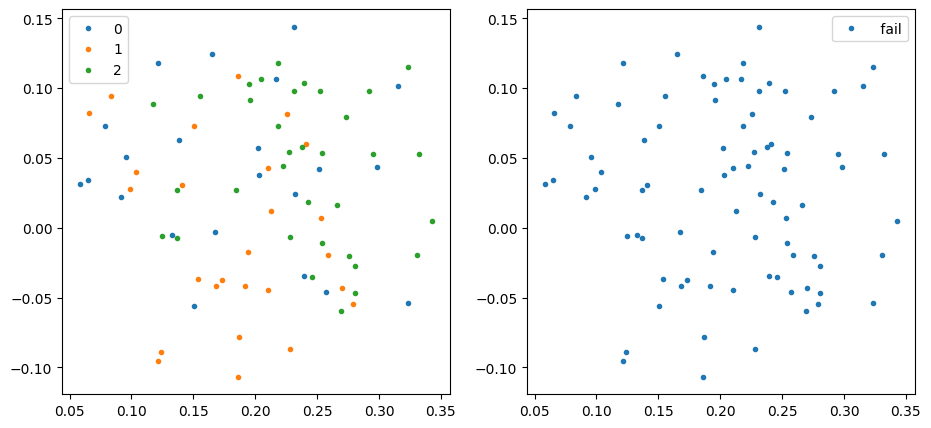

In [64]:
df_cat_fn_kmean = df_cat_fn.copy()

df_cat_fn_kmean["kmean"] = k_means.labels_
df_cat_fn_kmean["pass/fail"] = y

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = df_cat_fn_kmean.groupby('kmean')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = df_cat_fn_kmean.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[1], group[2], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

In [65]:
# Kmeans grounp
df_name_group = df_cat_fn_kmean[["kmean"]]
df_name_group = df_name_group.sort_values(by="kmean", axis=0)
df_name_group.to_csv('df_cat_fn_kmean.csv')

# PCA

In [54]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)  

[2.74039121e-01 2.07461389e-01 6.84229030e-02 5.30451789e-02
 3.25253014e-02 2.18701710e-02 1.50032712e-02 1.27558735e-02
 9.04646433e-03 8.03125985e-03 5.26337200e-03 3.76185069e-03
 3.50791623e-03 2.57080429e-03 1.51615441e-03 1.26151993e-03
 9.82501106e-04 7.33859554e-04 4.44412534e-04 3.94165665e-04
 2.59402915e-04 2.14236785e-04 1.63515761e-04 1.35210153e-04
 1.03239481e-04 9.05674861e-05 6.70060387e-05 5.62923735e-05
 4.70857764e-05 3.87601853e-05 3.34473372e-05 2.56595491e-05
 1.95674149e-05 1.71469838e-05 1.33765911e-05 1.16353658e-05
 8.19639720e-06 7.52665281e-06 6.65437619e-06 5.48358567e-06
 4.55027414e-06 3.69794583e-06 3.21778818e-06 2.20491550e-06
 1.48668755e-06 1.29340966e-06 1.00840628e-06 7.05819887e-07
 4.24569499e-07 3.39256583e-07 2.83978465e-07 2.19114128e-07
 1.94320022e-07 1.16264134e-07 7.01379379e-08 3.90405317e-08
 2.16577190e-08 6.98583925e-09 4.46162524e-09 2.90358577e-12
 4.03357508e-13 1.43920183e-13 1.05603534e-13 9.79132041e-14
 7.53852621e-14 6.363213

In [27]:
pca.n_components = 3
X_reduced = pca.fit_transform(X)

dfx = pd.DataFrame(data=X_reduced)
dfx['pass/fail'] = rslt_df["pass/fail"].to_list()

dfx.head()

,0,1,2,pass/fail
0,0.431809,0.170673,-0.183006,fail
1,-0.170328,0.938481,0.305567,fail
2,0.651170,0.620870,0.133809,fail
3,-0.470436,0.566235,0.242694,pass
4,-0.482551,0.476574,0.207684,pass


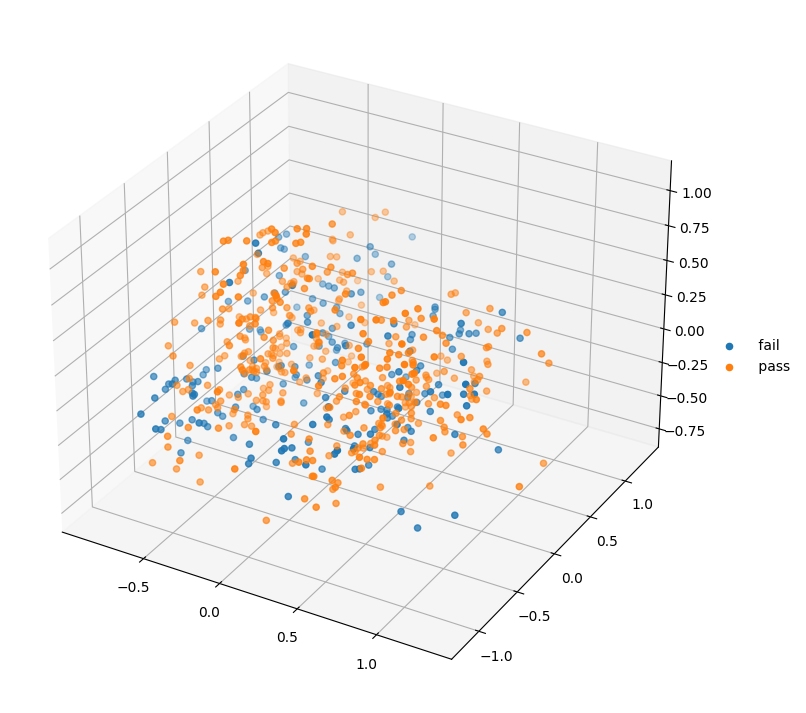

In [28]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

groups = dfx.groupby('pass/fail')
for name, group in groups:
    ax.scatter(group[0], group[1], group[2], label=name)

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

In [29]:
X_pca = dfx[list(range(0, pca.n_components))]
y_pca = dfx["pass/fail"]

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X_pca)

print(k_means.labels_[::10])

[3 3 0 3 0 1 3 0 0 0 4 3 0 4 0 1 0 4 0 1 2 2 3 3 0 3 4 3 4 4 3 0 1 1 1 0 3
 4 1 2 2 3 0 4 0 3 0 0 4 3 4 1 1 4 4 1 0 0 4 4 3 2 4 1 2]


/home/tbarber/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


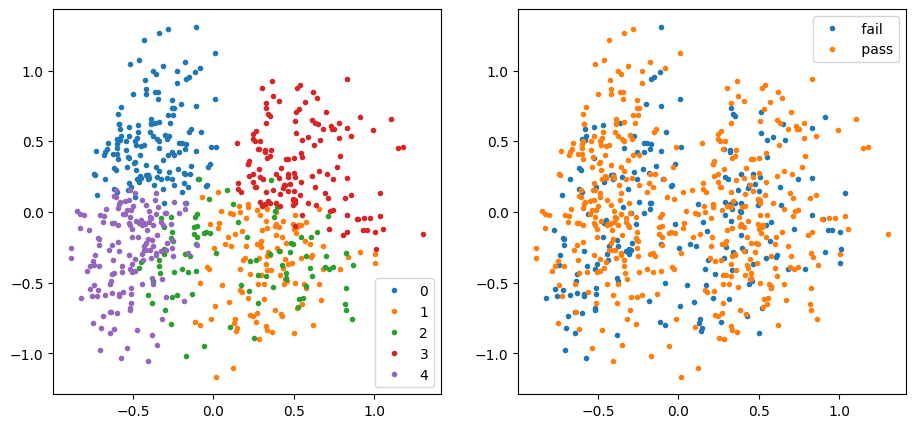

In [30]:
pca_rslt_df_kmeans = X_pca.copy()

pca_rslt_df_kmeans["kmean"] = k_means.labels_
pca_rslt_df_kmeans["pass/fail"] = y_pca

fig = plt.figure(figsize=(11, 5))

# Kmeans grounp
plt.subplot(1, 2, 1)
groups = pca_rslt_df_kmeans.groupby('kmean')
for name, group in groups:
    plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

# Ground truth
plt.subplot(1, 2, 2)
groups = pca_rslt_df_kmeans.groupby('pass/fail')
for name, group in groups:
    plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
plt.legend()

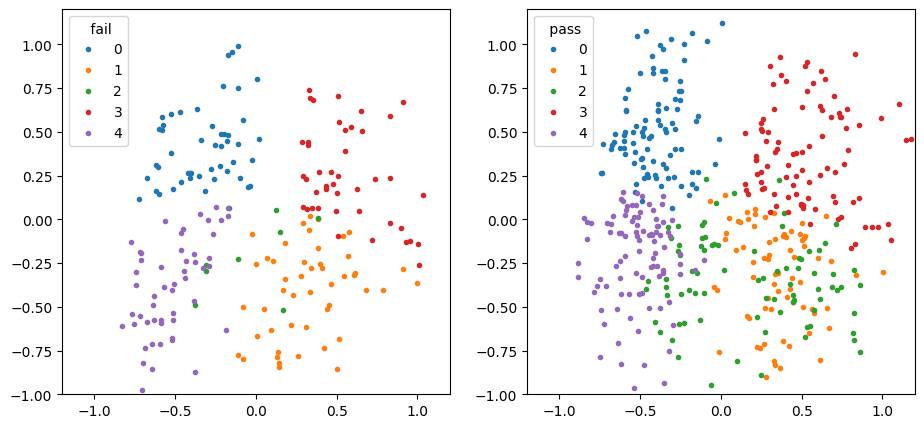

In [31]:
# Same data as plot above but slightly different
fig = plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)

i = 1
groups_pass = pca_rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    groups = group_pass.groupby('kmean')
    plt.subplot(1, 2, i)
    for name, group in groups:
        plt.plot(group[0], group[1], marker='o', linestyle='', markersize=3, label=name)
    plt.ylim(-1.0, 1.2)
    plt.xlim(-1.2, 1.2)
    plt.legend(title=passed)
    i = i + 1

kmean
4    53
0    50
1    48
3    43
2     8
Name: count, dtype: int64
kmean
0    96
4    95
3    93
2    82
1    76
Name: count, dtype: int64


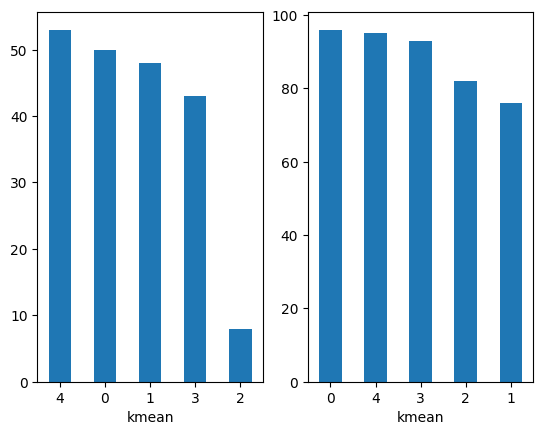

In [32]:
i = 1
groups_pass = pca_rslt_df_kmeans.groupby('pass/fail')
for passed, group_pass in groups_pass:
    plt.subplot(1, 2, i)
    vcs = group_pass["kmean"].value_counts(sort=True)
    vcs.sort_values()
    print(vcs)
    vcs.plot.bar(rot=0)
    i = i + 1